In [1]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading required package: grid
Loading required package: lattice
Loading required package: modeltools
Loading required package: stats4


# analysis

In [2]:
datasetName="/stor/public/hcad/heart_heart_HCLAdultHeart1/heart_heart_HCLAdultHeart1"

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv.gz"),header = TRUE, sep='\t',row.names = 1)

In [4]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)

In [5]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [6]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.1362”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.49668”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.6522e-15”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”Centering and scaling data matrix


In [7]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  ADIRF, TAGLN, MYL9, ACTA2, MGP, DSTN, TPM2, DCN, APOD, MT2A 
	   TIMP3, PLA2G2A, CLU, LUM, RGS16, NDUFA4L2, C7, MFAP4, GPX3, RGS5 
	   CSRP2, PPP1R14A, MYL6, RERGL, MT1E, C1R, IFI27, GSN, MGST1, TM4SF1 
Negative:  FTL, FTH1, CTSB, C1QB, CD74, GPR183, C5AR1, CD83, TMSB4X, CXCL8 
	   PLAUR, LYZ, SOD2, CCL3L3, C1QA, CCL3, CXCL3, IL1B, IER3, NFKBIA 
	   BCL2A1, LIPA, IL1RN, SRGN, CXCL2, C1QC, CYBB, AIF1, INSIG1, MAFB 
PC_ 2 
Positive:  SEPP1, RNASE1, LGMN, C1QA, F13A1, MRC1, C1QB, LYVE1, FCGR2B, FCGBP 
	   STAB1, C1QC, CTSZ, LILRB5, CD163, GPNMB, MAF, FOLR2, ACP5, CTSB 
	   CTSD, MT-ND3, MS4A4A, SLCO2B1, CCL13, MAN1A1, CPM, SESN1, CD68, GATM 
Negative:  IL1B, FCN1, G0S2, B2M, BCL2A1, SRGN, PLAUR, CD52, EREG, CCL20 
	   SOD2, NAMPT, S100A8, TMSB4X, S100A9, FTH1, PLAC8, AQP9, TMSB10, TIMP1 
	   APOBEC3A, THBS1, OLR1, SERPINB2, PTGS2, CXCL8, RPS27, SERPINA1, GPR183, CXCL3 
PC_ 3 
Positive:  ACTA2, TPM2, TAGLN, MYL9, MYL6, ADIRF, RERGL, MT-CO1, DSTN, PPP1R14A 
	   MT2A, CSRP2

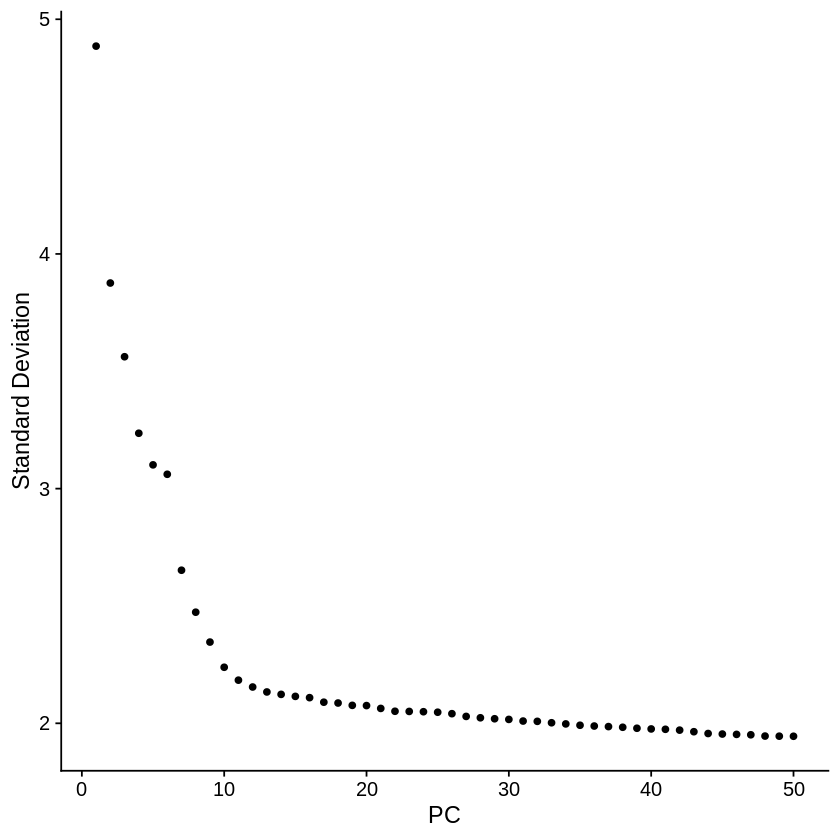

In [8]:
ElbowPlot(dataobj,50) 

In [9]:
pcDim = 40
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”21:44:20 UMAP embedding parameters a = 0.9922 b = 1.112
21:44:20 Read 1308 rows and found 40 numeric columns
21:44:20 Using Annoy for neighbor search, n_neighbors = 30
21:44:20 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
21:44:20 Writing NN index file to temp file /tmp/RtmpgcdwvV/file59d5881a367
21:44:20 Searching Annoy index using 1 thread, search_k = 3000
21:44:20 Annoy recall = 100%
21:44:21 Commencing smooth kNN distance calibration using 1 thread
21:44:21 Initializing from normalized Laplacian + noise
21:44:21 Commencing optimization

In [10]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

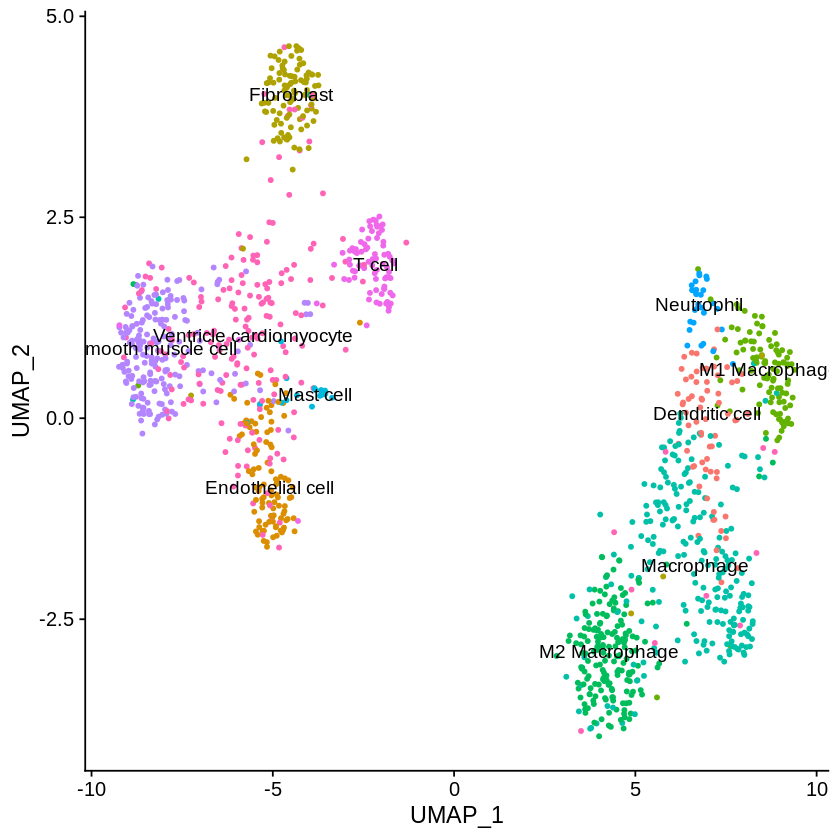

In [11]:
p_umap2

# Clustering

In [13]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


In [19]:
dataobj <- FindClusters(dataobj, resolution = 2.5, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1308
Number of edges: 91191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.4722
Number of communities: 12
Elapsed time: 0 seconds


In [21]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

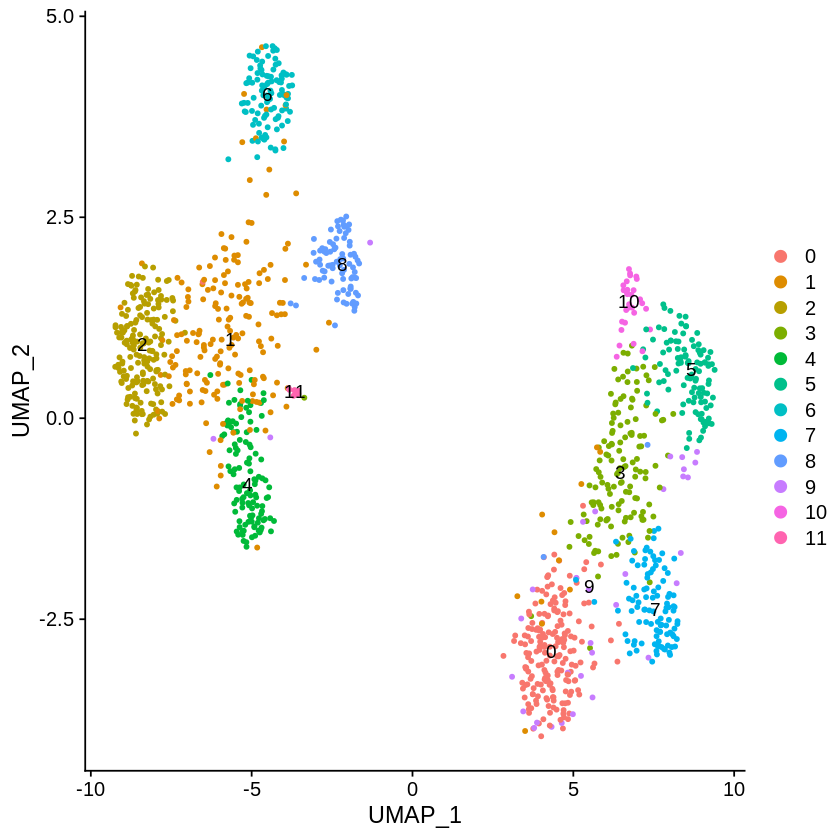

In [24]:
p_umap

# Finding cluster markers 

In [22]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11


# annotation

In [36]:
dataobj.markers[dataobj.markers['cluster']==11,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
TPSD1,3.842892e-115,2.178531,0.4,0.000,8.071995e-111,11,TPSD1
RGS13,2.315585e-92,2.132455,0.4,0.001,4.863887e-88,11,RGS13
CTSG,1.088197e-86,4.109158,1.0,0.018,2.285757e-82,11,CTSG
GCSAML,3.134494e-65,1.825497,0.3,0.001,6.584004e-61,11,GCSAML
CPA3,4.449175e-64,3.609253,1.0,0.029,9.345491e-60,11,CPA3
TPSAB1,2.709332e-63,4.472356,0.9,0.022,5.690953e-59,11,TPSAB1
C1orf186,5.477822e-58,2.300331,0.4,0.003,1.150616e-53,11,C1orf186
CMA1,8.560738e-52,2.383034,0.6,0.011,1.798183e-47,11,CMA1
MS4A2,2.300487e-46,2.287539,0.4,0.005,4.832174e-42,11,MS4A2


In [7]:
new.cluster.ids <- c('Heart-Connective Tissue-Macrophage-RNASE1 SEPP1',
                     'Heart-Musle Tissue-Cardiomyocyte Cell-MYL2 MYH7',
                     'Heart-Musle Tissue-Smooth muscle cell-ACTA2 TAGLN',
                     'Heart-Connective Tissue-Dendritic cell-CCL3L3 CXCL8',
                     'Heart-Epithelial Tissue-Endothelial cell-RND1 ACKR1',
                     'Heart-Connective Tissue-Macrophage-FCN1 SERPINA1',
                     'Heart-Connective Tissue-Fibrocyte-DCN APOD',
                     'Heart-Connective Tissue-Macrophage-SPP1 APOC1',
                     'Heart-Connective Tissue-T cell-GZMA NKG7',
                     'Heart-Connective Tissue-NK cell-SPC25',
                     'Heart-Connective Tissue-Macrophage-CD74 HLA-DPB1',
                     'Heart-Connective Tissue-Neutrophilic granulocyte-SERPINB2 S100A12',
                     'Heart-Connective Tissue-Mast cell-TPSD1 RGS13
')

In [8]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

Warning message:
“Cannot find identity NA”Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

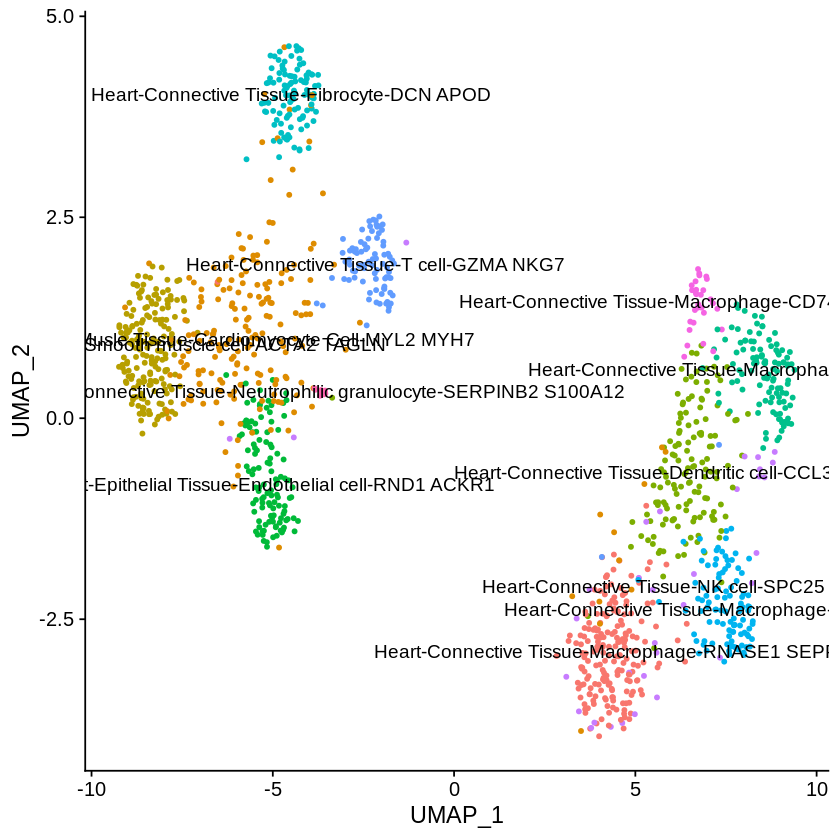

In [9]:
plot

In [42]:
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = plot, width = 8, height = 5)

In [3]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [10]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [12]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [13]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [14]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)

# update annotation

# HCL Adult Heart 1

In [2]:
dataobj <- readRDS("/stor/public/hcad/db_v1/heart_heart_HCLAdultHeart1/heart_heart_HCLAdultHeart1.seuratobj.dbupload_v1.rds")

In [5]:
dataobj$cell_type[dataobj$hcad_name=="Heart-Connective tissue-NK cell-SPC25"] <- "Macrophage"
dataobj$marker_gene[dataobj$hcad_name=="Heart-Connective tissue-NK cell-SPC25"] <- "CD74"
dataobj$hcad_name[dataobj$hcad_name=="Heart-Connective tissue-NK cell-SPC25"] <- "Heart-Connective tissue-Macrophage-CD74"

In [8]:
saveRDS(dataobj, "/stor/public/hcad/db_v1.1/heart_heart_HCLAdultHeart1/heart_heart_HCLAdultHeart1.seuratobj.dbupload_v1.rds")